In [ ]:
# load in the dataset
import numpy as np
import struct

# test image file path
#"C:\Users\keliz\OneDrive\Desktop\PROJECT\OCR Images\t10k-images-idx3-ubyte\t10k-images-idx3-ubyte"
# test label file path
# "C:\Users\keliz\OneDrive\Desktop\PROJECT\OCR Images\t10k-labels-idx1-ubyte\t10k-labels-idx1-ubyte"
# train image file path
# "C:\Users\keliz\OneDrive\Desktop\PROJECT\OCR Images\train-images-idx3-ubyte\train-images-idx3-ubyte"
# train label file path
# "C:\Users\keliz\OneDrive\Desktop\PROJECT\OCR Images\train-labels-idx1-ubyte\train-labels-idx1-ubyte"

def load_mnist_images(file_path):
    with open(file_path, 'rb') as f:
        magic, num, rows, cols = struct.unpack(">IIII", f.read(16))
        images = np.fromfile(f, dtype=np.uint8).reshape(num, rows, cols, 1)
        images = images.astype(np.float32) / 255.0
    return images

def load_mnist_labels(file_path):
    with open(file_path, 'rb') as f:
        magic, num = struct.unpack(">II", f.read(8))
        labels = np.fromfile(f, dtype=np.uint8)
    return labels

# Load the dataset
train_images = load_mnist_images('train-images-idx3-ubyte')
train_labels = load_mnist_labels('train-labels-idx1-ubyte')
test_images = load_mnist_images('t10k-images-idx3-ubyte')
test_labels = load_mnist_labels('t10k-labels-idx1-ubyte')

# Convert labels to one-hot encoding
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

print('Train images shape:', train_images.shape)
print('Train labels shape:', train_labels.shape)
print('Test images shape:', test_images.shape)
print('Test labels shape:', test_labels.shape)


Train images shape: (60000, 28, 28, 1)
Train labels shape: (60000, 10)
Test images shape: (10000, 28, 28, 1)
Test labels shape: (10000, 10)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  # 10 classes for digits 0-9
])

# Compile the model
model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=10, batch_size=64,
                    validation_data=(test_images, test_labels))

# Evaluate the model on the test set
loss, accuracy = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {accuracy}')

Epoch 1/10
938/938 [==============================] - 57s 59ms/step - loss: 0.2528 - accuracy: 0.9208 - val_loss: 0.0637 - val_accuracy: 0.9818
Epoch 2/10
938/938 [==============================] - 50s 53ms/step - loss: 0.0777 - accuracy: 0.9767 - val_loss: 0.0520 - val_accuracy: 0.9827
Epoch 3/10
938/938 [==============================] - 51s 54ms/step - loss: 0.0547 - accuracy: 0.9829 - val_loss: 0.0481 - val_accuracy: 0.9850
Epoch 4/10
938/938 [==============================] - 51s 54ms/step - loss: 0.0435 - accuracy: 0.9865 - val_loss: 0.0411 - val_accuracy: 0.9882
Epoch 5/10
938/938 [==============================] - 51s 54ms/step - loss: 0.0347 - accuracy: 0.9896 - val_loss: 0.0473 - val_accuracy: 0.9863
Epoch 6/10
938/938 [==============================] - 52s 56ms/step - loss: 0.0288 - accuracy: 0.9908 - val_loss: 0.0421 - val_accuracy: 0.9880
Epoch 7/10
938/938 [==============================] - 52s 56ms/step - loss: 0.0249 - accuracy: 0.9920 - val_loss: 0.0610 - val_accuracy:

In [ ]:
!pip install scikit-learn

313/313 [==============================] - 4s 13ms/step


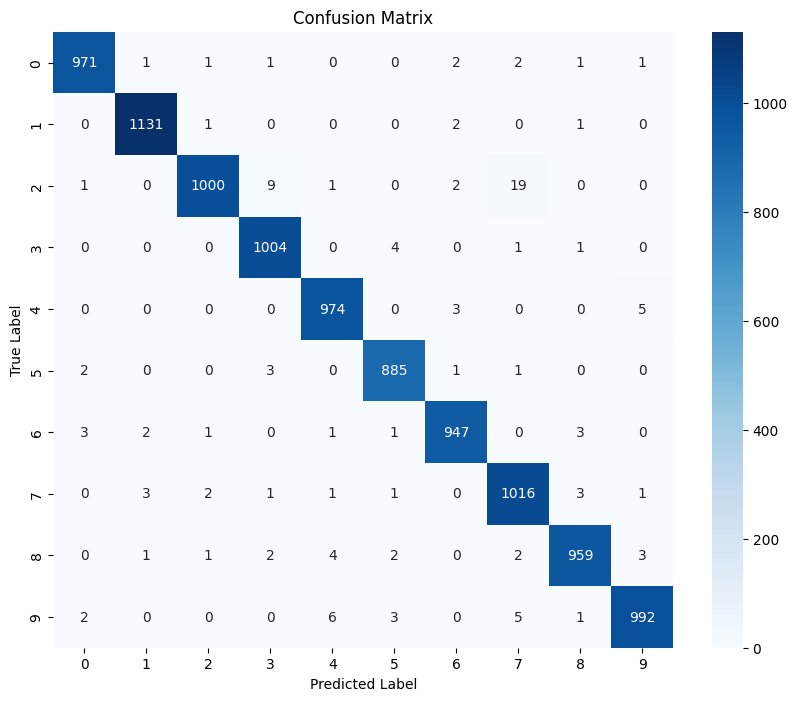

In [ ]:
# further evaluation of algorithm
# import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

# Predict the values from the test set
Y_pred = model.predict(test_images)
Y_pred_classes = np.argmax(Y_pred, axis=1)
Y_true = np.argmax(test_labels, axis=1)

# Create the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Print the classification report
print(classification_report(Y_true, Y_pred_classes))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.97      0.98      1032
           3       0.98      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.97      0.99      0.98      1028
           8       0.99      0.98      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



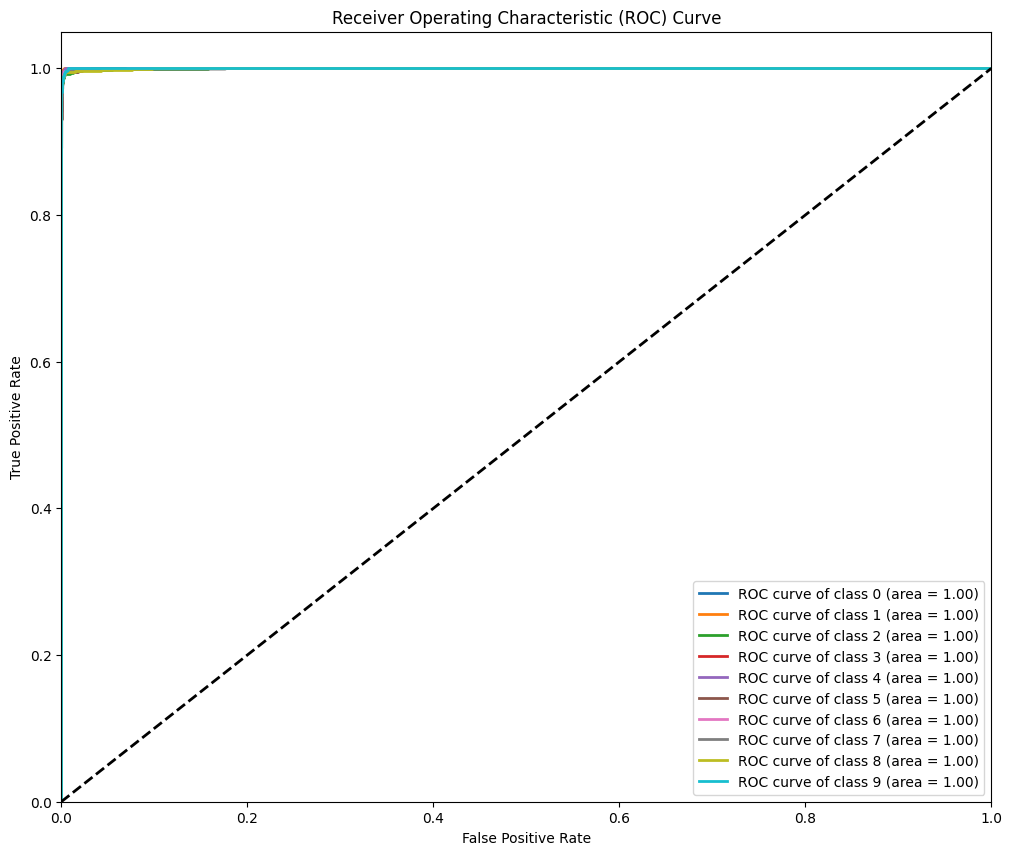

In [ ]:
# Binarize the true labels for ROC curve
from sklearn.preprocessing import label_binarize

n_classes = 10  # number of classes for digits 0-9
Y_true_binarized = label_binarize(Y_true, classes=range(n_classes))

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_true_binarized[:, i], Y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(12, 10))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'ROC curve of class {i} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(Y_true, Y_pred_classes, average='weighted')
recall = recall_score(Y_true, Y_pred_classes, average='weighted')
f1 = f1_score(Y_true, Y_pred_classes, average='weighted')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

Precision: 0.9880
Recall: 0.9879
F1 Score: 0.9879


In [ ]:
# convert model to tensorflow lite for flutter app usage
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TFLite model
with open('ocr_wnwn_model.tflite', 'wb') as f:
    f.write(tflite_model)

In [ ]:
# download the model to pc
from google.colab import files

files.download('ocr_wnwn_model.tflite')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving t10k-images.idx3-ubyte to t10k-images.idx3-ubyte


In [ ]:
import os
uploaded_files = os.listdir()
print(uploaded_files)

['.config', 't10k-labels.idx1-ubyte', 'train-images.idx3-ubyte', 't10k-images.idx3-ubyte', 'train-labels.idx1-ubyte', 'sample_data']


In [ ]:
# TESTING WITH KFOLD CROSS-VALIDATION

import numpy as np
import struct
#from google.colab import files

# Load MNIST images
def load_mnist_images(file_path):
    with open(file_path, 'rb') as f:
        magic, num, rows, cols = struct.unpack(">IIII", f.read(16))
        images = np.fromfile(f, dtype=np.uint8).reshape(num, rows, cols, 1)
        images = images.astype(np.float32) / 255.0
    return images

# Load MNIST labels
def load_mnist_labels(file_path):
    with open(file_path, 'rb') as f:
        magic, num = struct.unpack(">II", f.read(8))
        labels = np.fromfile(f, dtype=np.uint8)
    return labels

# Paths to uploaded files
train_images_path = 'train-images.idx3-ubyte'
train_labels_path = 'train-labels.idx1-ubyte'
test_images_path = 't10k-images.idx3-ubyte'
test_labels_path = 't10k-labels.idx1-ubyte'

# Load the dataset
train_images = load_mnist_images(train_images_path)
train_labels = load_mnist_labels(train_labels_path)
test_images = load_mnist_images(test_images_path)
test_labels = load_mnist_labels(test_labels_path)

# Convert labels to one-hot encoding
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

print('Train images shape:', train_images.shape)
print('Train labels shape:', train_labels.shape)
print('Test images shape:', test_images.shape)
print('Test labels shape:', test_labels.shape)


Train images shape: (60000, 28, 28, 1)
Train labels shape: (60000, 10)
Test images shape: (10000, 28, 28, 1)
Test labels shape: (10000, 10)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2  # added regularizer

# added
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import KFold
import numpy as np

# Function to create the CNN model
def create_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1), kernel_regularizer=l2(0.001)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.001)),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(0.001)),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(512, activation='relu', kernel_regularizer=l2(0.001)),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])

    model.compile(optimizer=Adam(),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Create the data generator
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=False,
    fill_mode='nearest'
)

# Assuming train_images and train_labels are your training data and labels
kfold = KFold(n_splits=5, shuffle=True)

# Convert train_labels to categorical if they are not already
if train_labels.ndim == 1:
    train_labels = tf.keras.utils.to_categorical(train_labels, num_classes=10)

cvscores = []

for train, test in kfold.split(train_images, train_labels):
    model = create_model()

    history = model.fit(datagen.flow(train_images[train], train_labels[train], batch_size=64),
                        epochs=10,
                        validation_data=(train_images[test], train_labels[test]))

    scores = model.evaluate(train_images[test], train_labels[test], verbose=0)
    print(f'Score for fold: {model.metrics_names[1]} of {scores[1]*100:.2f}%')
    cvscores.append(scores[1] * 100)

print(f'Cross-validation accuracy: {np.mean(cvscores):.2f}% (+/- {np.std(cvscores):.2f}%)')




# Define the CNN model
# alter dropout rate to 0.5 to combat overfitting

#model = Sequential([
#    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1), kernel_regularizer=l2(0.001)),
#    MaxPooling2D((2, 2)),
#    Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.001)),
#    MaxPooling2D((2, 2)),
#    Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(0.001)),
#    MaxPooling2D((2, 2)),
#    Flatten(),
#    Dense(512, activation='relu', kernel_regularizer=l2(0.001)),
#    Dropout(0.5),
#    Dense(10, activation='softmax')
#])


# Compile the model
#model.compile(optimizer=Adam(),
#              loss='categorical_crossentropy',
#              metrics=['accuracy'])

#from tensorflow.keras.preprocessing.image import ImageDataGenerator

#datagen = ImageDataGenerator(
#    rotation_range=15,
#    width_shift_range=0.1,
#    height_shift_range=0.1,
#    shear_range=0.1,
#    zoom_range=0.1,
#    horizontal_flip=False,
#    fill_mode='nearest'
#)

# Fit the model using augmented data
#history = model.fit(datagen.flow(train_images, train_labels, batch_size=64),
#                    epochs=10,
#                    validation_data=(test_images, test_labels))


# Train the model
#history = model.fit(train_images, train_labels, epochs=10, batch_size=64,
 #                   validation_data=(test_images, test_labels))


Epoch 1/10
750/750 [==============================] - 63s 82ms/step - loss: 0.7379 - accuracy: 0.8275 - val_loss: 0.3143 - val_accuracy: 0.9631
Epoch 2/10
750/750 [==============================] - 60s 81ms/step - loss: 0.3982 - accuracy: 0.9303 - val_loss: 0.2509 - val_accuracy: 0.9737
Epoch 3/10
750/750 [==============================] - 61s 81ms/step - loss: 0.3340 - accuracy: 0.9448 - val_loss: 0.2273 - val_accuracy: 0.9745
Epoch 4/10
750/750 [==============================] - 61s 81ms/step - loss: 0.3096 - accuracy: 0.9479 - val_loss: 0.2239 - val_accuracy: 0.9727
Epoch 5/10
750/750 [==============================] - 59s 79ms/step - loss: 0.2901 - accuracy: 0.9506 - val_loss: 0.2048 - val_accuracy: 0.9793
Epoch 6/10
750/750 [==============================] - 61s 82ms/step - loss: 0.2758 - accuracy: 0.9549 - val_loss: 0.2288 - val_accuracy: 0.9661
Epoch 7/10
750/750 [==============================] - 62s 82ms/step - loss: 0.2615 - accuracy: 0.9578 - val_loss: 0.1764 - val_accuracy:

313/313 [==============================] - 4s 14ms/step - loss: 0.1676 - accuracy: 0.9839
Test accuracy: 0.9839000105857849
313/313 [==============================] - 3s 8ms/step


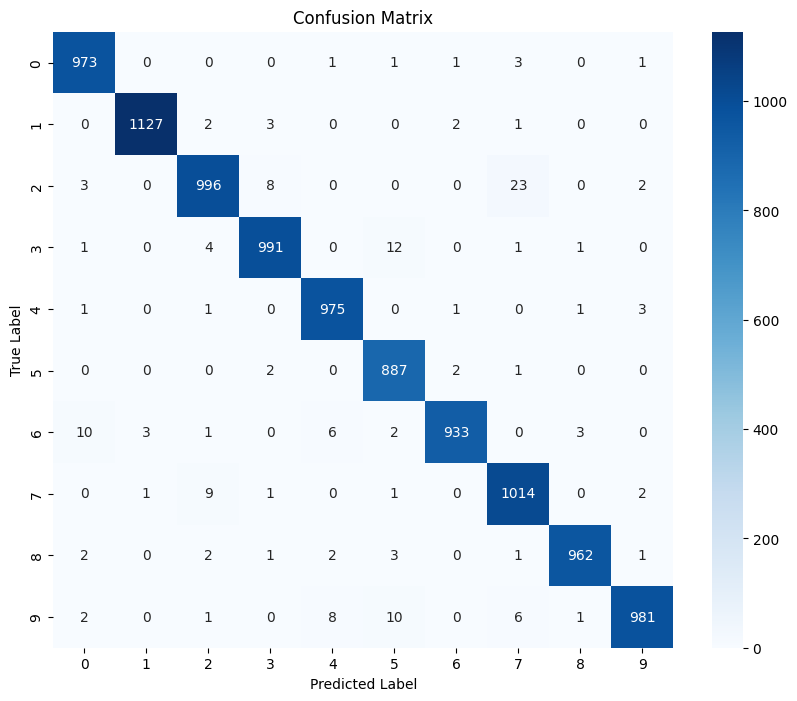

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.98      0.97      0.97      1032
           3       0.99      0.98      0.98      1010
           4       0.98      0.99      0.99       982
           5       0.97      0.99      0.98       892
           6       0.99      0.97      0.98       958
           7       0.97      0.99      0.98      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [ ]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {accuracy}')

# Predict the values from the test set
Y_pred = model.predict(test_images)
Y_pred_classes = np.argmax(Y_pred, axis=1)
Y_true = np.argmax(test_labels, axis=1)

# Create the confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Classification report
from sklearn.metrics import classification_report
report = classification_report(Y_true, Y_pred_classes)
print(report)


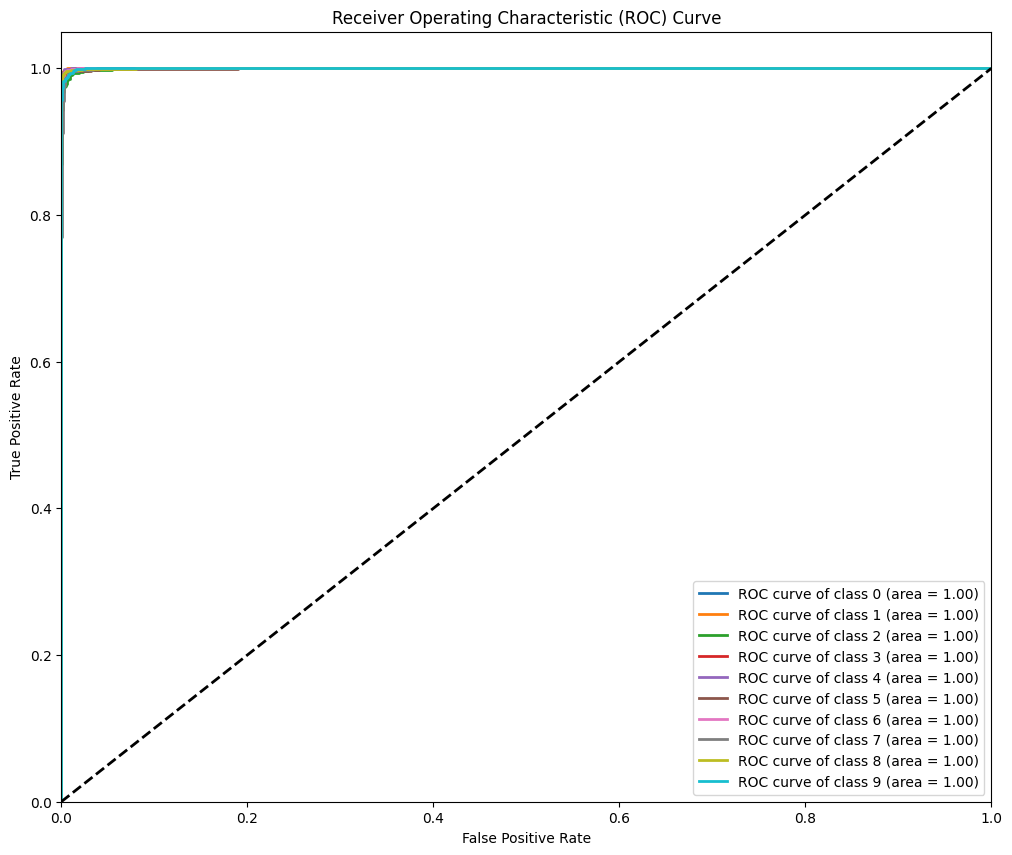

In [ ]:
# Binarize the true labels for ROC curve
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import label_binarize

n_classes = 10  # number of classes for digits 0-9
Y_true_binarized = label_binarize(Y_true, classes=range(n_classes))

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_true_binarized[:, i], Y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(12, 10))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'ROC curve of class {i} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

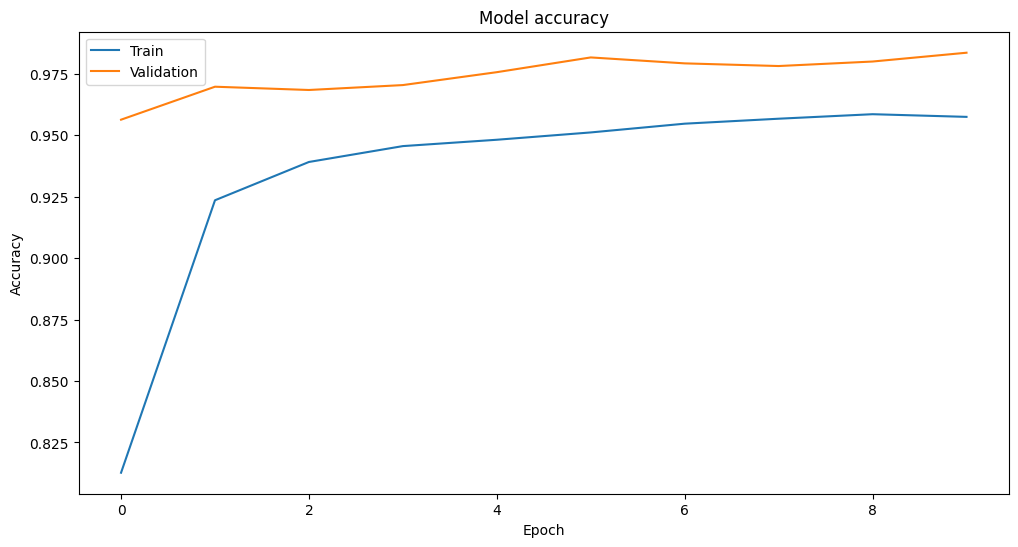

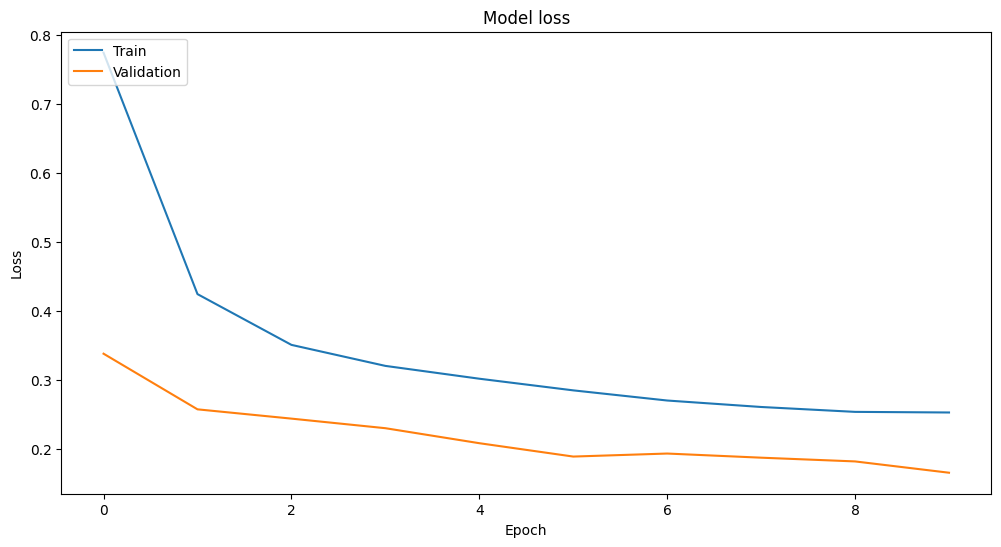

In [ ]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()